#Necessary Imports

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import nltk
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [258]:
#downloading the stopwords corpus

nltk.download('stopwords')
"""
a = ['.', 'and', 'ok']
stopWords = set(stopwords.words('english'))
for i in a:
  if i in stopWords:
    print("Hurra ")
"""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'\na = [\'.\', \'and\', \'ok\']\nstopWords = set(stopwords.words(\'english\'))\nfor i in a:\n  if i in stopWords: \n    print("Hurra ")\n'

#Loading Dataset

In [259]:
df = pd.read_csv("/content/drive/MyDrive/Spam SMS detection/spam.csv", encoding = 'latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Data Exploration and Preprocessing

In [260]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [261]:
#Drop unnecessary features from the dataframe
df.drop(columns = df.columns[2:], inplace = True)

In [262]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [264]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [265]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [266]:
new_columns = {'v1' : "ham or spam", 'v2' : 'message'}
df.rename(columns = new_columns , inplace = True)

In [267]:
df.head()

,ham or spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Visualization

In [268]:
df['ham or spam'].value_counts()


ham     4825
spam     747
Name: ham or spam, dtype: int64

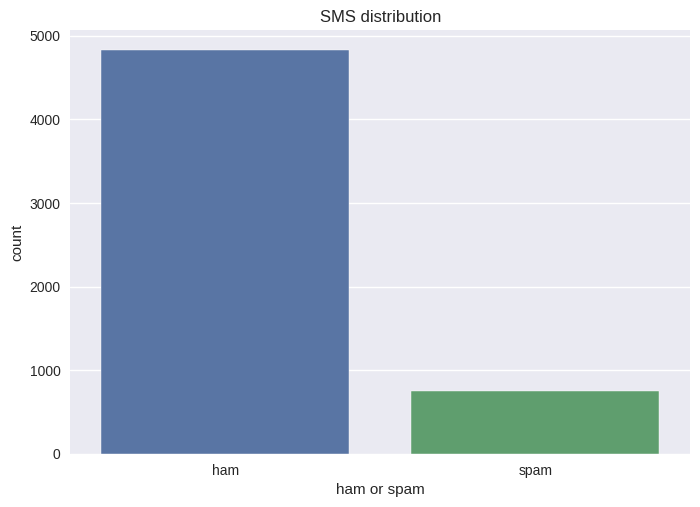

In [269]:
sns.countplot(data = df, x = "ham or spam")
plt.xlabel("ham or spam")
plt.ylabel("count")
plt.title("SMS distribution")
plt.show()

### Data Encoding

In [270]:
"""
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
"""
#OR



"\nfrom sklearn.preprocessing import LabelEncoder\nencoder = LabelEncoder()\ndf['target'] = encoder.fit_transform(df['target'])\n"

In [271]:
targets = df["ham or spam"]
a = []
for i in targets:
  if i == "ham":
    a.append(int(1))
  else:
    a.append(int(0))
df["ham or spam"] = a
df.head()

,ham or spam,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [272]:
X = df["message"] #feature
y = df["ham or spam"] #target
print(X.shape, y.shape)

(5572,) (5572,)


### Data Splitting

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [274]:
print(X_train.shape, X_test.shape)

(3900,) (1672,)


### Feature Extraction

In [275]:
#Initializing TF-IDF vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [276]:
X_train = feature_extraction.fit_transform(X_train)
#transform test set using parameters obtained from training data
X_test = feature_extraction.transform(X_test)

In [277]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [278]:
print("TF-IDF values")
print(X_train)

TF-IDF values
  (0, 4263)	0.305799279106993
  (0, 1854)	0.48433507816009225
  (0, 4058)	0.3642047907160024
  (0, 6601)	0.4407771080326701
  (0, 1056)	0.587347209421454
  (1, 4308)	0.460148381356604
  (1, 4575)	0.48510068917989
  (1, 5585)	0.4506619541960395
  (1, 3017)	0.39253982156413353
  (1, 6217)	0.4424444372107054
  (2, 2346)	0.45855518004713475
  (2, 1780)	0.5239061570249967
  (2, 4093)	0.3684757658818883
  (2, 5042)	0.6160154993512705
  (3, 3078)	0.3205614535212927
  (3, 1434)	0.2643396514972477
  (3, 47)	0.25683866242814685
  (3, 4097)	0.25683866242814685
  (3, 2688)	0.15723326798887605
  (3, 1251)	0.27373368272388465
  (3, 4332)	0.21465708978122336
  (3, 5675)	0.28631087822888385
  (3, 4145)	0.25683866242814685
  (3, 3629)	0.22191456272049712
  (3, 6049)	0.2794957725084233
  :	:
  (3895, 1559)	0.6325287576241374
  (3895, 5125)	0.36422070838736614
  (3895, 3625)	0.4339572052055966
  (3895, 5687)	0.35877201442668866
  (3895, 3076)	0.38757506637377215
  (3896, 3441)	0.36978625488

In [279]:
print("TF-TDF in matrix form ")
print(X_train.toarray())
print("\n-----Not a zero matrix values are there----")
print(X_train.toarray()[0][4261:4270])

TF-TDF in matrix form 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

-----Not a zero matrix values are there----
[0.         0.         0.30579928 0.         0.         0.
 0.         0.         0.        ]


In [280]:
print(X_train.shape)

(3900, 6942)


#Model Training using Logistic Regression

In [281]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

###Evaluation of model Prediction

In [282]:
y_pred_log = model.predict(X_test)

In [283]:
accuracy_log = accuracy_score(y_test, y_pred_log)
print("The accuraccy got using logistic regression model is {:.2f}%".format(accuracy_log*100))

96.53%


In [293]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       218
           1       0.96      1.00      0.98      1454

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.96      1672



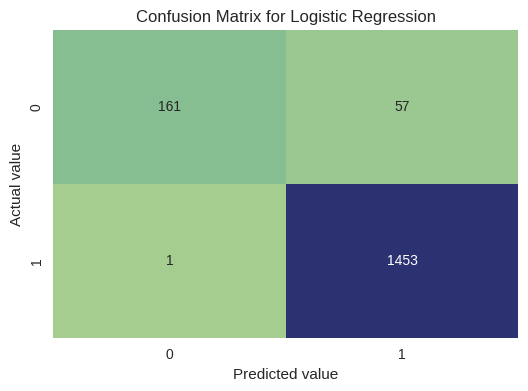

In [307]:
conf_matrix=confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="crest",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

#Model Training using Support Vector Machine

In [284]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)

In [285]:
svc.fit(X_train, y_train)

SVC(gamma=1.0, kernel='sigmoid')

###Evaluation of model prediction

In [298]:
y_pred_svm = svc.predict(X_test)

In [299]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("The accuracy got using support vector machine is {:.2f}%".format(accuracy_svm*100))

The accuracy got using support vector machine is 98.44%


In [300]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       218
           1       0.98      1.00      0.99      1454

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



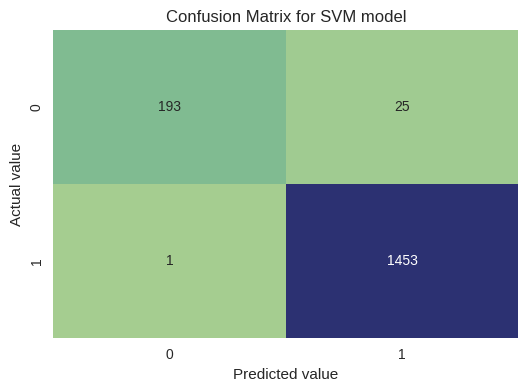

In [305]:
conf_matrix=confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="crest",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix for SVM model")
plt.show()

In [308]:
print("Accuracy Summary :- \n")
print("Logistic Regression :- {:.2f}%".format(accuracy_log*100))
print("Support Vector Machine :- {:.2f}%".format(accuracy_svm*100))

Accuracy Summary :- 

Logistic Regression :- 96.53%
Support Vector Machine :- 98.44%
